In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [7]:
def get_np_array(file_name, label_encoder=None):
    data = pd.read_csv(file_name)
    
    need_label_encoding = ['team','host','opp','month', 'day_match']
    if (label_encoder is None):
        label_encoder = OrdinalEncoder()
        label_encoder.fit(data[need_label_encoding])
    data_1 = pd.DataFrame(label_encoder.transform(data[need_label_encoding]), columns = label_encoder.get_feature_names_out())
    
    #merge the two dataframes
    dont_need_label_encoding =  ["year","toss","bat_first","format" ,"fow","score" ,"rpo" ,"result"]
    data_2 = data[dont_need_label_encoding]
    final_data = pd.concat([data_1, data_2], axis=1)
    
    X = final_data.iloc[:,:-1]
    y = final_data.iloc[:,-1:]
    return X.to_numpy(), y.to_numpy()

In [8]:
X_train, y_train = get_np_array('../a3_data_starter_code/train.csv')
X_test, y_test = get_np_array("../a3_data_starter_code/test.csv")

In [9]:
X_val, y_val = get_np_array('../a3_data_starter_code/val.csv')

(d) Scikit Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
max_depths = [15, 25, 35, 45]
# TODO: use x_val to get best 1. depth 2. ccp_alpha

acc_train_skl = []
acc_test_skl = []
acc_val_skl = []

best_acc = -1
for d in max_depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=0)
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train).reshape(-1,1)
    y_test_pred = clf.predict(X_test).reshape(-1,1)
    y_val_pred = clf.predict(X_val).reshape(-1,1)
    
    acc_train_skl.append(np.mean(y_train == y_train_pred))
    acc_test_skl.append(np.mean(y_test == y_test_pred))
    acc_val_skl.append(np.mean(y_val == y_val_pred))

    if acc_val_skl[-1] > best_acc:
        best_depth = d
        best_acc = acc_val_skl[-1]

In [35]:
print(f"Best depth: {best_depth} with accuracy={best_acc}")

Best depth: 15 with accuracy=0.6482758620689655


Text(0, 0.5, 'Accuracy')

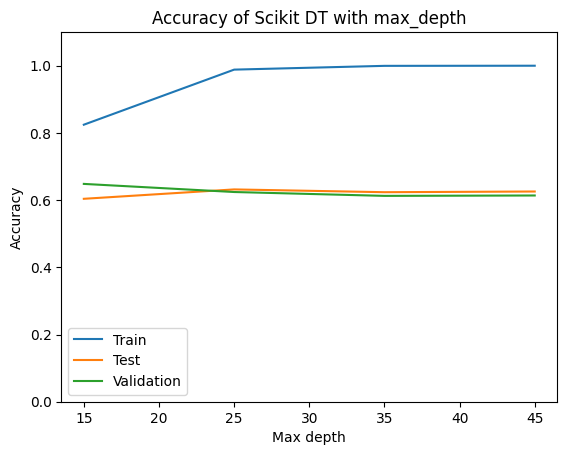

In [37]:
fig, ax = plt.subplots()
ax.plot(max_depths, acc_train_skl, label="Train")
ax.plot(max_depths, acc_test_skl, label="Test")
ax.plot(max_depths, acc_val_skl, label="Validation")

plt.legend()
plt.title('Accuracy of Scikit DT with max_depth')
plt.ylim(0,1.1)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [38]:
ccp_param = [0.001, 0.01, 0.1, 0.2]
# TODO: use x_val to get best 1. depth 2. ccp_alpha

acc_train_sklp = []
acc_test_sklp = []
acc_val_sklp = []

best_acc = -1
for ccp in ccp_param:
    clf = DecisionTreeClassifier(criterion='entropy', ccp_alpha=ccp, random_state=0)
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train).reshape(-1,1)
    y_test_pred = clf.predict(X_test).reshape(-1,1)
    y_val_pred = clf.predict(X_val).reshape(-1,1)
    
    acc_train_sklp.append(np.mean(y_train == y_train_pred))
    acc_test_sklp.append(np.mean(y_test == y_test_pred))
    acc_val_sklp.append(np.mean(y_val == y_val_pred))

    if acc_val_sklp[-1] > best_acc:
        best_ccp = ccp
        best_acc = acc_test_sklp[-1]

In [39]:
print(f"Best ccp_alpha: {best_ccp} with accuracy={best_acc}")

Best ccp_alpha: 0.001 with accuracy=0.6318510858324715


Text(0, 0.5, 'Accuracy')

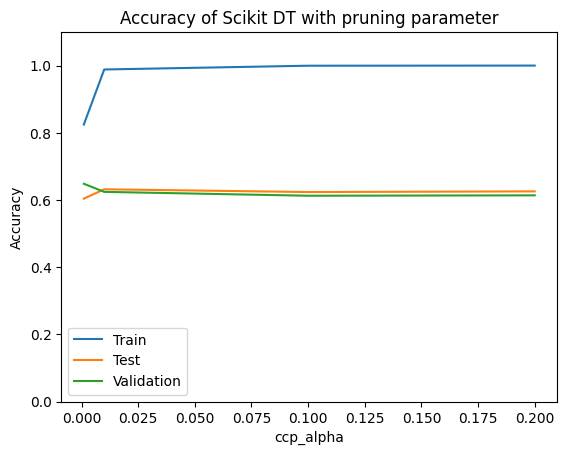

In [40]:
fig, ax = plt.subplots()
ax.plot(ccp_param, acc_train_skl, label="Train")
ax.plot(ccp_param, acc_test_skl, label="Test")
ax.plot(ccp_param, acc_val_skl, label="Validation")

plt.legend()
plt.title('Accuracy of Scikit DT with pruning parameter')
plt.ylim(0,1.1)
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')

In [41]:
clf = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.001, max_depth=15)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train).reshape(-1,1)
y_test_pred = clf.predict(X_test).reshape(-1,1)

print("Train accuracy =", np.mean(y_train == y_train_pred))
print("Test accuracy =", np.mean(y_test == y_test_pred))

Train accuracy = 0.6844257058898684
Test accuracy = 0.6225439503619442


(e) Random Forest

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [5]:
param_grid = {
    'n_estimators': [50, 150, 250, 350],
    'max_features': [0.1, 0.3, 0.5, 0.7, 0.9],
    'min_samples_split': [2, 4, 6, 8, 10]
}

In [13]:
best_oob = -1
for n_est in param_grid['n_estimators']:
    for max_f in param_grid['max_features']:
        for min_split in param_grid['min_samples_split']:
            
            rf = RandomForestClassifier(n_estimators=n_est, max_features=max_f, min_samples_split=min_split, oob_score=True)
            rf.fit(X_train, y_train.flatten())

            if rf.oob_score_ > best_oob:
                best_oob = rf.oob_score_
                best_rf = rf

In [ ]:
print(f"Best parameters: \n n_estimators: {best_rf.n_estimators}, max_features: {best_rf.max_features}, min_samples_split: {best_rf.min_samples_split}" )
print("Out-of-bag accuracy: ", best_rf.oob_score_)

print("Training accuracy: ", best_rf.score(X_train, y_train))
print("Validation accuracy: ", best_rf.score(X_val, y_val))
print("Test accuracy: ", best_rf.score(X_test, y_test))

Best parameters: 
 n_estimators: 150, max_features: 0.3, min_samples_split: 10
Out-of-bag accuracy:  0.7310591542097866
Training accuracy:  0.9445509135045356
Validation accuracy:  0.7114942528735633
Test accuracy:  0.7311271975180972


In [14]:
rf = RandomForestClassifier(oob_score=True)

# scoring_oob = make_scorer(lambda clf, X: clf.oob_score_, greater_is_better=True)
# doesn't work

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring = 'accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train.flatten())

print("Best parameters: ", grid_search.best_params_)
print("Training accuracy: ", grid_search.score(X_train, y_train))
print("Out-of-bag accuracy: ", grid_search.best_estimator_.oob_score_)
print("Validation accuracy: ", grid_search.score(X_val, y_val))
print("Test accuracy: ", grid_search.score(X_test, y_test))

Best parameters:  {'max_features': 0.3, 'min_samples_split': 10, 'n_estimators': 350}
Training accuracy:  0.9427622332950045
Out-of-bag accuracy:  0.7273540309186151
Validation accuracy:  0.7172413793103448
Test accuracy:  0.7238883143743536
